Looking at qualities of tilt and things fom model runs with uniform vwinds (vtau = 0.2) and varying time scales.

In [4]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from salishsea_tools import (nc_tools, viz_tools, gsw_calls)
import numpy.ma as ma
from matplotlib import animation, rc
from scipy.optimize import curve_fit
from visualisations import *
%matplotlib inline

In [2]:
rc('animation', html='html5')

In [3]:
mesh_mask = nc.Dataset('/home/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')
new_domain = mesh_mask.variables['tmask'][0,:,334:,114:]   
lakebathy = nc.Dataset('/home/vdo/MEOPAR/NEMO-forcing/grid/lake_bathy201702.nc')
lake_meshmask = nc.Dataset('/home/vdo/MEOPAR/NEMO-forcing/grid/lake_meshmask201702.nc')
U24W = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/24UW/SalishSea_1h_20170101_20170105_grid_T.nc')
U24S = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/24US/SalishSea_1h_20160601_20160605_grid_T.nc')
U48W = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/48UW/SalishSea_1h_20170101_20170105_grid_T.nc')
U48S = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/48US/SalishSea_1h_20160601_20160605_grid_T.nc')
U72W = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/72UW/SalishSea_1h_20170101_20170105_grid_T.nc')
U72S = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/72US/SalishSea_1h_20160601_20160605_grid_T.nc')

In [10]:
def calc_rho(Sal, TempC, P):
    sqrSal = np.sqrt(Sal)
    R1 = ((((6.536332e-9 * TempC - 1.120083e-6) * TempC + 1.001685e-4)
           * TempC - 9.095290e-3) * TempC + 6.793952e-2) * TempC - 28.263737
    R2 = (((5.3875e-9 * TempC - 8.2467e-7) * TempC + 7.6438e-5)
          * TempC - 4.0899e-3) * TempC + 8.24493e-1
    R3 = (-1.6546e-6 * TempC + 1.0227e-4) * TempC - 5.72466e-3
    SIG = (4.8314e-4 * Sal + R3 * sqrSal + R2) * Sal + R1
    V350P = 1.0 / 1028.1063
    SVA   = -SIG * V350P / (1028.1063 + SIG)
    rho = 28.106331 - SVA / (V350P * (V350P + SVA)) + 1000
    return rho

In [5]:
file1 = U24W

In [8]:
deptht = file1.variables['deptht'][:]
yslicemask = 1 - new_domain[:,yslice,:]

In [56]:
def func(x,m,b):
    return m*x + b

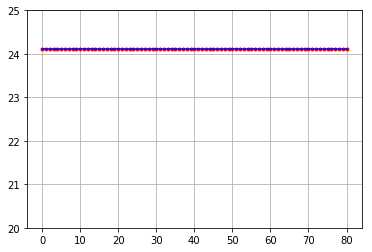

In [63]:
yslice=200
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file1.variables['deptht'][:], 1) * np.ones(284),
                                        (np.ones([284,40]) *np.expand_dims(file1.variables['nav_lat'][yslice,:][:],1)).T])
deptht = file1.variables['deptht'][:]
i = 0
density1 = calc_rho(file1.variables['vosaline'][i,:,yslice,68:149],
                    file1.variables['votemper'][i,:,yslice,68:149],
                    pressure1[:, 68:149])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((81))
for x in range(81):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,81), list_of_depths1)
plt.plot(np.arange(0,81), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(20,25)
plt.plot(np.arange(0,81), func(np.arange(0,81), *popt), 'b-')

In [141]:
density1 = calc_rho(file1.variables['vosaline'][:,:,yslice,68:149],
                    file1.variables['votemper'][:,:,yslice,68:149],
                    pressure1[:, 68:149])
rho = 1023.3
density1.shape

(102, 40, 81)

In [142]:
index1 = (np.abs(density1 - rho)).argmin(axis=1)
list_of_depths1 = np.zeros((102, 81))
for t in range(102):
    for x in range(81):
        list_of_depths1[t,x] = deptht[index1[t,x]]

In [136]:
list_of_depths1.max()

34.685756683349609

In [147]:
list_of_depths1[0,0]

24.100255966186523

In [143]:
list_of_depths1[30,:]

array([ 11.50931168,  12.51816654,  13.53541183,  12.51816654,
        13.53541183,  14.56898212,  16.76117325,  16.76117325,
        16.76117325,  16.76117325,  16.76117325,  18.00713539,
        18.00713539,  19.48178482,  19.48178482,  19.48178482,
        19.48178482,  21.38997841,  21.38997841,  21.38997841,
        21.38997841,  21.38997841,  21.38997841,  21.38997841,
        21.38997841,  21.38997841,  21.38997841,  21.38997841,
        21.38997841,  21.38997841,  21.38997841,  21.38997841,
        21.38997841,  21.38997841,  24.10025597,  24.10025597,
        24.10025597,  24.10025597,  24.10025597,  24.10025597,
        24.10025597,  24.10025597,  24.10025597,  24.10025597,
        24.10025597,  24.10025597,  24.10025597,  24.10025597,
        24.10025597,  24.10025597,  24.10025597,  24.10025597,
        24.10025597,  24.10025597,  24.10025597,  24.10025597,
        28.22991562,  28.22991562,  28.22991562,  28.22991562,
        28.22991562,  28.22991562,  28.22991562,  28.22

In [222]:
i = 31
popt, pcov = curve_fit(func, np.arange(0,81), list_of_depths1[i,:])
plt.plot(np.arange(0,81), list_of_depths1[i,:], 'r.')
plt.grid('on')
plt.ylim(35,0)
plt.plot(np.arange(0,81), func(np.arange(0,81), *popt), 'b-')
print(popt[0])

IndexError: too many indices for array

In [193]:
file2 = U48S
yslice=200
pressure2 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file2.variables['deptht'][:], 1) * np.ones(284),
                                        (np.ones([284,40]) *np.expand_dims(file2.variables['nav_lat'][yslice,:][:],1)).T])
deptht = file2.variables['deptht'][:]
density2 = calc_rho(file2.variables['vosaline'][:,:,yslice,68:149],
                    file2.variables['votemper'][:,:,yslice,68:149],
                    pressure2[:, 68:149])
rho = 1023.3
index2 = (np.abs(density2 - rho)).argmin(axis=1)
list_of_depths2 = np.zeros((102, 81))
for t in range(102):
    for x in range(81):
        list_of_depths2[t,x] = deptht[index2[t,x]]

In [166]:
list_of_depths2[24,:]

array([ 11.50931168,  10.50476551,  11.50931168,  11.50931168,
        11.50931168,  13.53541183,  14.56898212,  16.76117325,
        15.63428783,  15.63428783,  16.76117325,  18.00713539,
        18.00713539,  19.48178482,  19.48178482,  21.38997841,
        21.38997841,  21.38997841,  21.38997841,  21.38997841,
        21.38997841,  21.38997841,  21.38997841,  21.38997841,
        21.38997841,  24.10025597,  24.10025597,  24.10025597,
        21.38997841,  21.38997841,  21.38997841,  21.38997841,
        21.38997841,  21.38997841,  21.38997841,  21.38997841,
        24.10025597,  21.38997841,  21.38997841,  24.10025597,
        24.10025597,  24.10025597,  24.10025597,  24.10025597,
        24.10025597,  24.10025597,  24.10025597,  24.10025597,
        24.10025597,  24.10025597,  24.10025597,  28.22991562,
        28.22991562,  28.22991562,  28.22991562,  24.10025597,
        24.10025597,  24.10025597,  24.10025597,  28.22991562,
        28.22991562,  28.22991562,  28.22991562,  28.22

0.220573917549


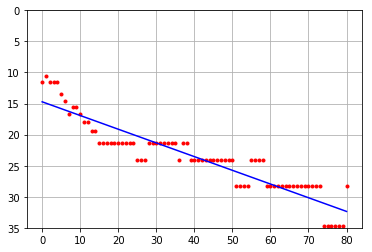

In [165]:
i = 24
popt, pcov = curve_fit(func, np.arange(0,81), list_of_depths2[i,:])
plt.plot(np.arange(0,81), list_of_depths2[i,:], 'r.')
plt.grid('on')
plt.ylim(35,0)
plt.plot(np.arange(0,81), func(np.arange(0,81), *popt), 'b-')
print(popt[0])

In [173]:
file3 = U72S
yslice=200
pressure3 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file3.variables['deptht'][:], 1) * np.ones(284),
                                        (np.ones([284,40]) *np.expand_dims(file3.variables['nav_lat'][yslice,:][:],1)).T])
deptht = file3.variables['deptht'][:]
density3 = calc_rho(file3.variables['vosaline'][:,:,yslice,68:149],
                    file3.variables['votemper'][:,:,yslice,68:149],
                    pressure3[:, 68:149])
rho = 1023.3
index3 = (np.abs(density3 - rho)).argmin(axis=1)
list_of_depths3 = np.zeros((102, 81))
for t in range(102):
    for x in range(81):
        list_of_depths3[t,x] = deptht[index3[t,x]]

In [195]:
list_of_depths3[87, :]

array([  0.5000003 ,   0.5000003 ,   0.5000003 ,   0.5000003 ,
         0.5000003 ,   0.5000003 ,   0.5000003 ,   0.5000003 ,
         0.5000003 ,   0.5000003 ,   0.5000003 ,   0.5000003 ,
         1.5000031 ,   1.5000031 ,   1.5000031 ,   1.5000031 ,
         1.5000031 ,   1.5000031 ,   3.50003052,   3.50003052,
         2.50001144,   2.50001144,   2.50001144,   1.5000031 ,
         0.5000003 ,   0.5000003 ,   0.5000003 ,   1.5000031 ,
         1.5000031 ,   2.50001144,   5.50015068,  11.50931168,
        14.56898212,  16.76117325,  19.48178482,  21.38997841,
        24.10025597,  24.10025597,  24.10025597,  28.22991562,
        28.22991562,  28.22991562,  28.22991562,  28.22991562,
        28.22991562,  28.22991562,  28.22991562,  28.22991562,
        28.22991562,  28.22991562,  34.68575668,  34.68575668,
        34.68575668,  34.68575668,  34.68575668,  34.68575668,
        34.68575668,  34.68575668,  34.68575668,  34.68575668,
        34.68575668,  34.68575668,  34.68575668,  34.68

0.214865763937


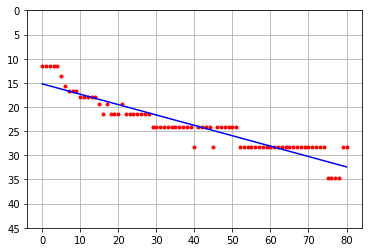

In [225]:
i = 17
popt, pcov = curve_fit(func, np.arange(0,81), list_of_depths3[i,:])
plt.plot(np.arange(0,81), list_of_depths3[i,:], 'r.')
plt.grid('on')
plt.ylim(45,0)
plt.plot(np.arange(0,81), func(np.arange(0,81), *popt), 'b-')
print(popt[0])

(57, 137)

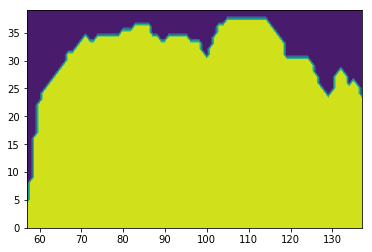

In [231]:
plt.contourf(lake_meshmask.variables['tmask'][0,:,210,:])
plt.xlim(57,137)

0.22120710873


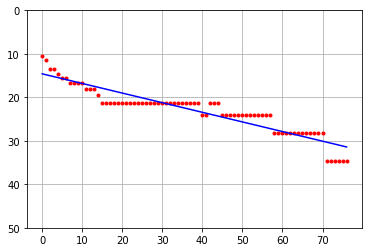

In [237]:
yslice = 210
deptht = file1.variables['deptht'][:]
yslicemask = 1 - new_domain[:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file1.variables['deptht'][:], 1) * np.ones(284),
                                        (np.ones([284,40]) *np.expand_dims(file1.variables['nav_lat'][yslice,:][:],1)).T])
i = 30
density1 = calc_rho(file1.variables['vosaline'][i,:,yslice,60:137],
                    file1.variables['votemper'][i,:,yslice,60:137],
                    pressure1[:, 60:137])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((77))
for x in range(77):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,77), list_of_depths1)
plt.plot(np.arange(0,77), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,77), func(np.arange(0,77), *popt), 'b-')
print(popt[0])

0.205390441908


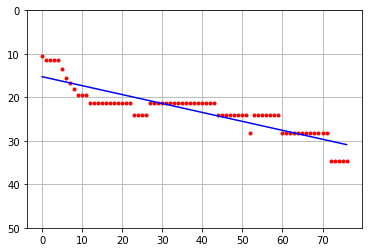

In [241]:
yslice = 210
deptht = file2.variables['deptht'][:]
yslicemask = 1 - new_domain[:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file2.variables['deptht'][:], 1) * np.ones(284),
                                        (np.ones([284,40]) *np.expand_dims(file2.variables['nav_lat'][yslice,:][:],1)).T])
i = 24
density1 = calc_rho(file2.variables['vosaline'][i,:,yslice,60:137],
                    file2.variables['votemper'][i,:,yslice,60:137],
                    pressure1[:, 60:137])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((77))
for x in range(77):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,77), list_of_depths1)
plt.plot(np.arange(0,77), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,77), func(np.arange(0,77), *popt), 'b-')
print(popt[0])

0.217622892644


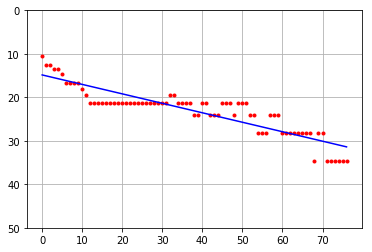

In [248]:
file3 = U72S
yslice = 210
deptht = file3.variables['deptht'][:]
yslicemask = 1 - new_domain[:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file3.variables['deptht'][:], 1) * np.ones(284),
                                        (np.ones([284,40]) *np.expand_dims(file3.variables['nav_lat'][yslice,:][:],1)).T])
i = 18
density1 = calc_rho(file3.variables['vosaline'][i,:,yslice,60:137],
                    file3.variables['votemper'][i,:,yslice,60:137],
                    pressure1[:, 60:137])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((77))
for x in range(77):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,77), list_of_depths1)
plt.plot(np.arange(0,77), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,77), func(np.arange(0,77), *popt), 'b-')
print(popt[0])

(78, 159)

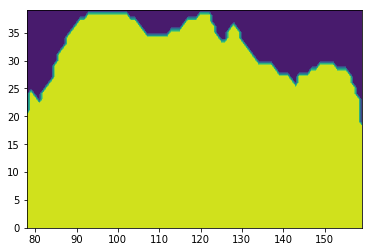

In [254]:
plt.contourf(lake_meshmask.variables['tmask'][0,:,190,:])
plt.xlim(78,159)

0.176430320264


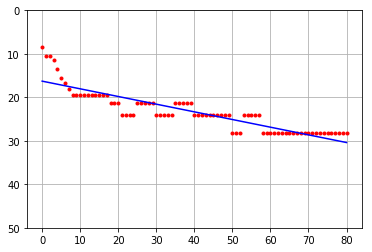

In [258]:
file1 = U24S
yslice = 190
deptht = file1.variables['deptht'][:]
yslicemask = 1 - new_domain[:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file1.variables['deptht'][:], 1) * np.ones(284),
                                        (np.ones([284,40]) *np.expand_dims(file1.variables['nav_lat'][yslice,:][:],1)).T])
i = 28
density1 = calc_rho(file1.variables['vosaline'][i,:,yslice,78:159],
                    file1.variables['votemper'][i,:,yslice,78:159],
                    pressure1[:, 78:159])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((81))
for x in range(81):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,81), list_of_depths1)
plt.plot(np.arange(0,81), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,81), func(np.arange(0,81), *popt), 'b-')
print(popt[0])

0.219928277


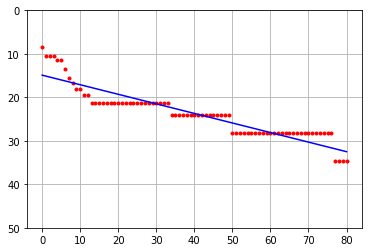

In [266]:
file1 = U48S
yslice = 190
deptht = file1.variables['deptht'][:]
yslicemask = 1 - new_domain[:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file1.variables['deptht'][:], 1) * np.ones(284),
                                        (np.ones([284,40]) *np.expand_dims(file1.variables['nav_lat'][yslice,:][:],1)).T])
i = 23
density1 = calc_rho(file1.variables['vosaline'][i,:,yslice,78:159],
                    file1.variables['votemper'][i,:,yslice,78:159],
                    pressure1[:, 78:159])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((81))
for x in range(81):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,81), list_of_depths1)
plt.plot(np.arange(0,81), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,81), func(np.arange(0,81), *popt), 'b-')
print(popt[0])

0.192798937461


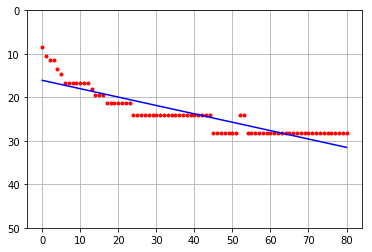

In [270]:
file1 = U72S
yslice = 190
deptht = file1.variables['deptht'][:]
yslicemask = 1 - new_domain[:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file1.variables['deptht'][:], 1) * np.ones(284),
                                        (np.ones([284,40]) *np.expand_dims(file1.variables['nav_lat'][yslice,:][:],1)).T])
i = 18
density1 = calc_rho(file1.variables['vosaline'][i,:,yslice,78:159],
                    file1.variables['votemper'][i,:,yslice,78:159],
                    pressure1[:, 78:159])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((81))
for x in range(81):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,81), list_of_depths1)
plt.plot(np.arange(0,81), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,81), func(np.arange(0,81), *popt), 'b-')
print(popt[0])

(55, 124)

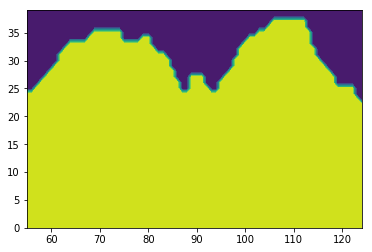

In [283]:
plt.contourf(lake_meshmask.variables['tmask'][0,:,220,:])
plt.xlim(55,124)

0.0994924732031


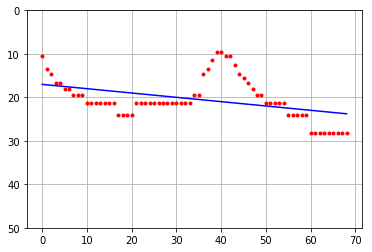

In [289]:
file1 = U24S
yslice = 220
deptht = file1.variables['deptht'][:]
yslicemask = 1 - new_domain[:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file1.variables['deptht'][:], 1) * np.ones(284),
                                        (np.ones([284,40]) *np.expand_dims(file1.variables['nav_lat'][yslice,:][:],1)).T])
i = 34
density1 = calc_rho(file1.variables['vosaline'][i,:,yslice,55:124],
                    file1.variables['votemper'][i,:,yslice,55:124],
                    pressure1[:, 55:124])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((69))
for x in range(69):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,69), list_of_depths1)
plt.plot(np.arange(0,69), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,69), func(np.arange(0,69), *popt), 'b-')
print(popt[0])

0.110232567362


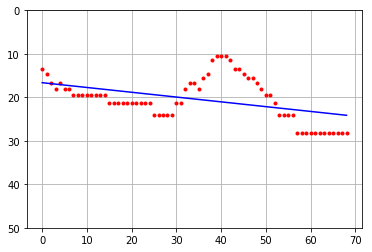

In [299]:
file1 = U48S
yslice = 220
deptht = file1.variables['deptht'][:]
yslicemask = 1 - new_domain[:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file1.variables['deptht'][:], 1) * np.ones(284),
                                        (np.ones([284,40]) *np.expand_dims(file1.variables['nav_lat'][yslice,:][:],1)).T])
i = 30
density1 = calc_rho(file1.variables['vosaline'][i,:,yslice,55:124],
                    file1.variables['votemper'][i,:,yslice,55:124],
                    pressure1[:, 55:124])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((69))
for x in range(69):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,69), list_of_depths1)
plt.plot(np.arange(0,69), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,69), func(np.arange(0,69), *popt), 'b-')
print(popt[0])

0.104066641258


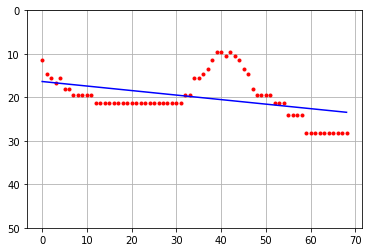

In [310]:
file1 = U72S
yslice = 220
deptht = file1.variables['deptht'][:]
yslicemask = 1 - new_domain[:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file1.variables['deptht'][:], 1) * np.ones(284),
                                        (np.ones([284,40]) *np.expand_dims(file1.variables['nav_lat'][yslice,:][:],1)).T])
i = 23
density1 = calc_rho(file1.variables['vosaline'][i,:,yslice,55:124],
                    file1.variables['votemper'][i,:,yslice,55:124],
                    pressure1[:, 55:124])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((69))
for x in range(69):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,69), list_of_depths1)
plt.plot(np.arange(0,69), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,69), func(np.arange(0,69), *popt), 'b-')
print(popt[0])

In [302]:
28.22991562 - 4.12965965 - 13.53541183

10.56484414

(82, 165)

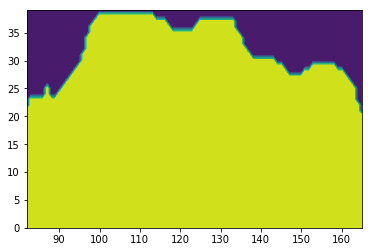

In [322]:
plt.contourf(lake_meshmask.variables['tmask'][0,:,180,:])
plt.xlim(82,165)

0.189358095762


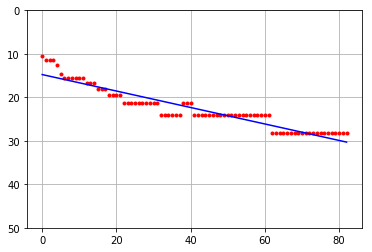

In [329]:
file1 = U24S
yslice = 180
deptht = file1.variables['deptht'][:]
yslicemask = 1 - new_domain[:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file1.variables['deptht'][:], 1) * np.ones(284),
                                        (np.ones([284,40]) *np.expand_dims(file1.variables['nav_lat'][yslice,:][:],1)).T])
i = 31
density1 = calc_rho(file1.variables['vosaline'][i,:,yslice,82:165],
                    file1.variables['votemper'][i,:,yslice,82:165],
                    pressure1[:, 82:165])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((83))
for x in range(83):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,83), list_of_depths1)
plt.plot(np.arange(0,83), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,83), func(np.arange(0,83), *popt), 'b-')
print(popt[0])

0.19253433918


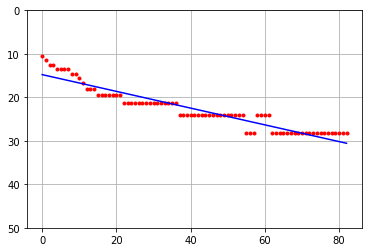

In [335]:
file1 = U48S
yslice = 180
deptht = file1.variables['deptht'][:]
yslicemask = 1 - new_domain[:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file1.variables['deptht'][:], 1) * np.ones(284),
                                        (np.ones([284,40]) *np.expand_dims(file1.variables['nav_lat'][yslice,:][:],1)).T])
i = 25
density1 = calc_rho(file1.variables['vosaline'][i,:,yslice,82:165],
                    file1.variables['votemper'][i,:,yslice,82:165],
                    pressure1[:, 82:165])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((83))
for x in range(83):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,83), list_of_depths1)
plt.plot(np.arange(0,83), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,83), func(np.arange(0,83), *popt), 'b-')
print(popt[0])

0.16143727174


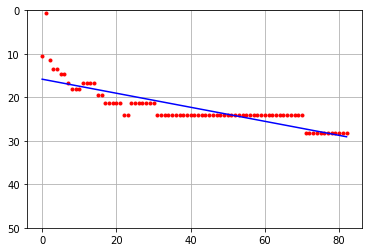

In [339]:
file1 = U72S
yslice = 180
deptht = file1.variables['deptht'][:]
yslicemask = 1 - new_domain[:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file1.variables['deptht'][:], 1) * np.ones(284),
                                        (np.ones([284,40]) *np.expand_dims(file1.variables['nav_lat'][yslice,:][:],1)).T])
i = 21
density1 = calc_rho(file1.variables['vosaline'][i,:,yslice,82:165],
                    file1.variables['votemper'][i,:,yslice,82:165],
                    pressure1[:, 82:165])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((83))
for x in range(83):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,83), list_of_depths1)
plt.plot(np.arange(0,83), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,83), func(np.arange(0,83), *popt), 'b-')
print(popt[0])

(95, 176)

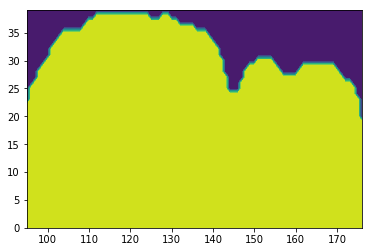

In [346]:
plt.contourf(lake_meshmask.variables['tmask'][0,:,170,:])
plt.xlim(95,176)

0.168350073508


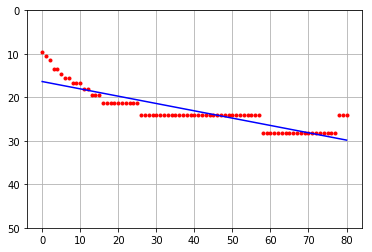

In [349]:
file1 = U24S
yslice = 170
deptht = file1.variables['deptht'][:]
yslicemask = 1 - new_domain[:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file1.variables['deptht'][:], 1) * np.ones(284),
                                        (np.ones([284,40]) *np.expand_dims(file1.variables['nav_lat'][yslice,:][:],1)).T])
i = 29
density1 = calc_rho(file1.variables['vosaline'][i,:,yslice,95:176],
                    file1.variables['votemper'][i,:,yslice,95:176],
                    pressure1[:, 95:176])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((81))
for x in range(81):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,81), list_of_depths1)
plt.plot(np.arange(0,81), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,81), func(np.arange(0,81), *popt), 'b-')
print(popt[0])

0.167833407977


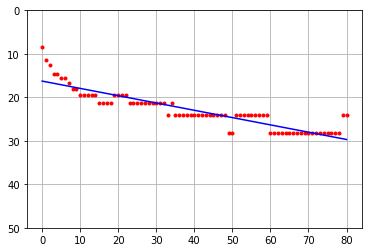

In [356]:
file1 = U48S
yslice = 170
deptht = file1.variables['deptht'][:]
yslicemask = 1 - new_domain[:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file1.variables['deptht'][:], 1) * np.ones(284),
                                        (np.ones([284,40]) *np.expand_dims(file1.variables['nav_lat'][yslice,:][:],1)).T])
i = 23
density1 = calc_rho(file1.variables['vosaline'][i,:,yslice,95:176],
                    file1.variables['votemper'][i,:,yslice,95:176],
                    pressure1[:, 95:176])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((81))
for x in range(81):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,81), list_of_depths1)
plt.plot(np.arange(0,81), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,81), func(np.arange(0,81), *popt), 'b-')
print(popt[0])

0.196921154195


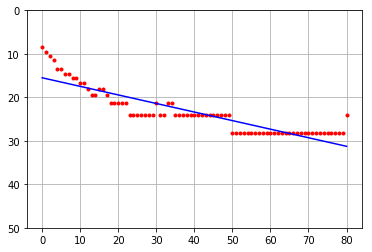

In [362]:
file1 = U72S
yslice = 170
deptht = file1.variables['deptht'][:]
yslicemask = 1 - new_domain[:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file1.variables['deptht'][:], 1) * np.ones(284),
                                        (np.ones([284,40]) *np.expand_dims(file1.variables['nav_lat'][yslice,:][:],1)).T])
i = 17
density1 = calc_rho(file1.variables['vosaline'][i,:,yslice,95:176],
                    file1.variables['votemper'][i,:,yslice,95:176],
                    pressure1[:, 95:176])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((81))
for x in range(81):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,81), list_of_depths1)
plt.plot(np.arange(0,81), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,81), func(np.arange(0,81), *popt), 'b-')
print(popt[0])

(100, 194)

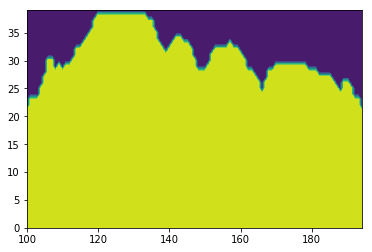

In [370]:
plt.contourf(lake_meshmask.variables['tmask'][0,:,160,:])
plt.xlim(100,194)

0.0947285231267


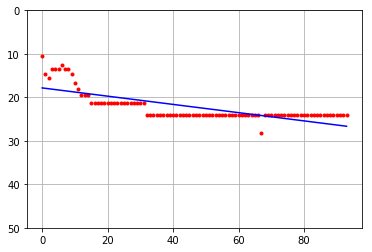

In [377]:
file1 = U24S
yslice = 160
deptht = file1.variables['deptht'][:]
yslicemask = 1 - new_domain[:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file1.variables['deptht'][:], 1) * np.ones(284),
                                        (np.ones([284,40]) *np.expand_dims(file1.variables['nav_lat'][yslice,:][:],1)).T])
i = 38
density1 = calc_rho(file1.variables['vosaline'][i,:,yslice,100:194],
                    file1.variables['votemper'][i,:,yslice,100:194],
                    pressure1[:, 100:194])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((94))
for x in range(94):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,94), list_of_depths1)
plt.plot(np.arange(0,94), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,94), func(np.arange(0,94), *popt), 'b-')
print(popt[0])

0.140963722067


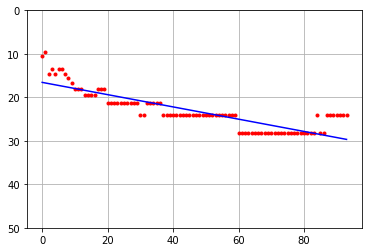

In [385]:
file1 = U48S
yslice = 160
deptht = file1.variables['deptht'][:]
yslicemask = 1 - new_domain[:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file1.variables['deptht'][:], 1) * np.ones(284),
                                        (np.ones([284,40]) *np.expand_dims(file1.variables['nav_lat'][yslice,:][:],1)).T])
i = 33
density1 = calc_rho(file1.variables['vosaline'][i,:,yslice,100:194],
                    file1.variables['votemper'][i,:,yslice,100:194],
                    pressure1[:, 100:194])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((94))
for x in range(94):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,94), list_of_depths1)
plt.plot(np.arange(0,94), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,94), func(np.arange(0,94), *popt), 'b-')
print(popt[0])

0.150079157736


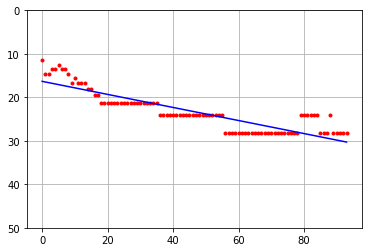

In [393]:
file1 = U72S
yslice = 160
deptht = file1.variables['deptht'][:]
yslicemask = 1 - new_domain[:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file1.variables['deptht'][:], 1) * np.ones(284),
                                        (np.ones([284,40]) *np.expand_dims(file1.variables['nav_lat'][yslice,:][:],1)).T])
i = 28
density1 = calc_rho(file1.variables['vosaline'][i,:,yslice,100:194],
                    file1.variables['votemper'][i,:,yslice,100:194],
                    pressure1[:, 100:194])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((94))
for x in range(94):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,94), list_of_depths1)
plt.plot(np.arange(0,94), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,94), func(np.arange(0,94), *popt), 'b-')
print(popt[0])

(112, 191)

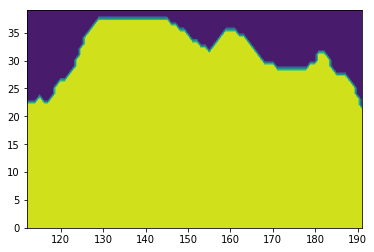

In [401]:
plt.contourf(lake_meshmask.variables['tmask'][0,:,150,:])
plt.xlim(112,191)

0.0937413592174
24.1002559662
14.5689821243


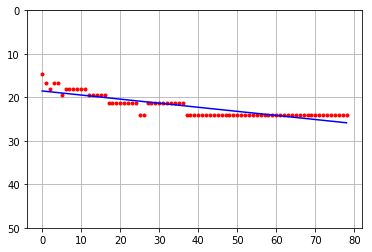

In [406]:
file1 = U24S
yslice = 150
deptht = file1.variables['deptht'][:]
yslicemask = 1 - new_domain[:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file1.variables['deptht'][:], 1) * np.ones(284),
                                        (np.ones([284,40]) *np.expand_dims(file1.variables['nav_lat'][yslice,:][:],1)).T])
i = 36
density1 = calc_rho(file1.variables['vosaline'][i,:,yslice,112:191],
                    file1.variables['votemper'][i,:,yslice,112:191],
                    pressure1[:, 112:191])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((79))
for x in range(79):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,79), list_of_depths1)
plt.plot(np.arange(0,79), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,79), func(np.arange(0,79), *popt), 'b-')
print(popt[0])
print(list_of_depths1.max())
print(list_of_depths1.min())

0.120969018173
28.2299156189
13.5354118347


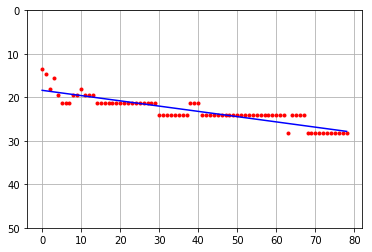

In [414]:
file1 = U48S
yslice = 150
deptht = file1.variables['deptht'][:]
yslicemask = 1 - new_domain[:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file1.variables['deptht'][:], 1) * np.ones(284),
                                        (np.ones([284,40]) *np.expand_dims(file1.variables['nav_lat'][yslice,:][:],1)).T])
i = 31
density1 = calc_rho(file1.variables['vosaline'][i,:,yslice,112:191],
                    file1.variables['votemper'][i,:,yslice,112:191],
                    pressure1[:, 112:191])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((79))
for x in range(79):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,79), list_of_depths1)
plt.plot(np.arange(0,79), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,79), func(np.arange(0,79), *popt), 'b-')
print(popt[0])
print(list_of_depths1.max())
print(list_of_depths1.min())

0.153638220362
28.2299156189
13.5354118347


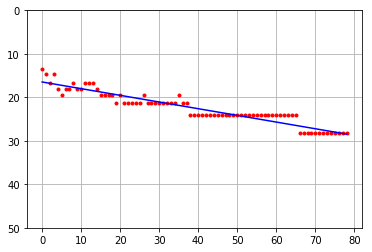

In [421]:
file1 = U72S
yslice = 150
deptht = file1.variables['deptht'][:]
yslicemask = 1 - new_domain[:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file1.variables['deptht'][:], 1) * np.ones(284),
                                        (np.ones([284,40]) *np.expand_dims(file1.variables['nav_lat'][yslice,:][:],1)).T])
i = 27
density1 = calc_rho(file1.variables['vosaline'][i,:,yslice,112:191],
                    file1.variables['votemper'][i,:,yslice,112:191],
                    pressure1[:, 112:191])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((79))
for x in range(79):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,79), list_of_depths1)
plt.plot(np.arange(0,79), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,79), func(np.arange(0,79), *popt), 'b-')
print(popt[0])
print(list_of_depths1.max())
print(list_of_depths1.min())

(121, 213)

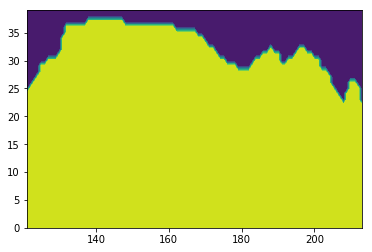

In [430]:
plt.contourf(lake_meshmask.variables['tmask'][0,:,140,:])
plt.xlim(121,213)

0.133079013342
28.2299156189
12.5181665421


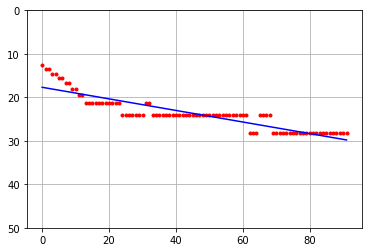

In [433]:
file1 = U24S
yslice = 140
deptht = file1.variables['deptht'][:]
yslicemask = 1 - new_domain[:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file1.variables['deptht'][:], 1) * np.ones(284),
                                        (np.ones([284,40]) *np.expand_dims(file1.variables['nav_lat'][yslice,:][:],1)).T])
i = 33
density1 = calc_rho(file1.variables['vosaline'][i,:,yslice,121:213],
                    file1.variables['votemper'][i,:,yslice,121:213],
                    pressure1[:, 121:213])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((92))
for x in range(92):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,92), list_of_depths1)
plt.plot(np.arange(0,92), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,92), func(np.arange(0,92), *popt), 'b-')
print(popt[0])
print(list_of_depths1.max())
print(list_of_depths1.min())

0.125304531609
28.2299156189
12.5181665421


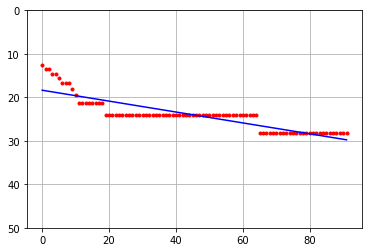

In [438]:
file1 = U48S
yslice = 140
deptht = file1.variables['deptht'][:]
yslicemask = 1 - new_domain[:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file1.variables['deptht'][:], 1) * np.ones(284),
                                        (np.ones([284,40]) *np.expand_dims(file1.variables['nav_lat'][yslice,:][:],1)).T])
i = 27
density1 = calc_rho(file1.variables['vosaline'][i,:,yslice,121:213],
                    file1.variables['votemper'][i,:,yslice,121:213],
                    pressure1[:, 121:213])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((92))
for x in range(92):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,92), list_of_depths1)
plt.plot(np.arange(0,92), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,92), func(np.arange(0,92), *popt), 'b-')
print(popt[0])
print(list_of_depths1.max())
print(list_of_depths1.min())

0.119954322235
34.6857566833
11.509311676


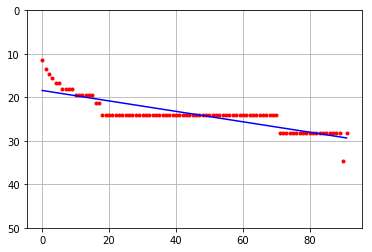

In [445]:
file1 = U72S
yslice = 140
deptht = file1.variables['deptht'][:]
yslicemask = 1 - new_domain[:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file1.variables['deptht'][:], 1) * np.ones(284),
                                        (np.ones([284,40]) *np.expand_dims(file1.variables['nav_lat'][yslice,:][:],1)).T])
i = 21
density1 = calc_rho(file1.variables['vosaline'][i,:,yslice,121:213],
                    file1.variables['votemper'][i,:,yslice,121:213],
                    pressure1[:, 121:213])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((92))
for x in range(92):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,92), list_of_depths1)
plt.plot(np.arange(0,92), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,92), func(np.arange(0,92), *popt), 'b-')
print(popt[0])
print(list_of_depths1.max())
print(list_of_depths1.min())

(130, 222)

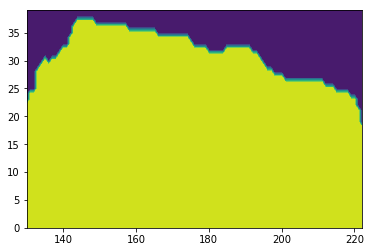

In [454]:
plt.contourf(lake_meshmask.variables['tmask'][0,:,130,:])
plt.xlim(130,222)

0.30990020178
44.5177230835
9.50243282318


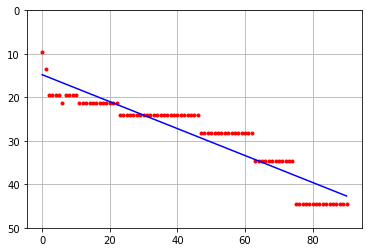

In [467]:
file1 = U24S
yslice = 130
deptht = file1.variables['deptht'][:]
yslicemask = 1 - new_domain[:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file1.variables['deptht'][:], 1) * np.ones(284),
                                        (np.ones([284,40]) *np.expand_dims(file1.variables['nav_lat'][yslice,:][:],1)).T])
i = 40
density1 = calc_rho(file1.variables['vosaline'][i,:,yslice,130:221],
                    file1.variables['votemper'][i,:,yslice,130:221],
                    pressure1[:, 130:221])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((91))
for x in range(91):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,91), list_of_depths1)
plt.plot(np.arange(0,91), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,91), func(np.arange(0,91), *popt), 'b-')
print(popt[0])
print(list_of_depths1.max())
print(list_of_depths1.min())

0.321790116226
44.5177230835
9.50243282318


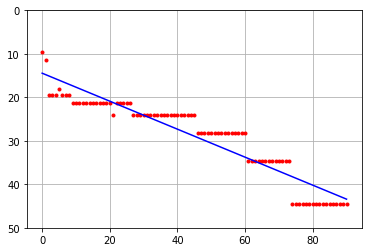

In [468]:
file1 = U48S
yslice = 130
deptht = file1.variables['deptht'][:]
yslicemask = 1 - new_domain[:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file1.variables['deptht'][:], 1) * np.ones(284),
                                        (np.ones([284,40]) *np.expand_dims(file1.variables['nav_lat'][yslice,:][:],1)).T])
i = 35
density1 = calc_rho(file1.variables['vosaline'][i,:,yslice,130:221],
                    file1.variables['votemper'][i,:,yslice,130:221],
                    pressure1[:, 130:221])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((91))
for x in range(91):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,91), list_of_depths1)
plt.plot(np.arange(0,91), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,91), func(np.arange(0,91), *popt), 'b-')
print(popt[0])
print(list_of_depths1.max())
print(list_of_depths1.min())

0.341672648507
44.5177230835
9.50243282318


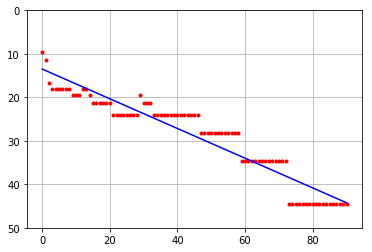

In [474]:
file1 = U72S
yslice = 130
deptht = file1.variables['deptht'][:]
yslicemask = 1 - new_domain[:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file1.variables['deptht'][:], 1) * np.ones(284),
                                        (np.ones([284,40]) *np.expand_dims(file1.variables['nav_lat'][yslice,:][:],1)).T])
i = 29
density1 = calc_rho(file1.variables['vosaline'][i,:,yslice,130:221],
                    file1.variables['votemper'][i,:,yslice,130:221],
                    pressure1[:, 130:221])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((91))
for x in range(91):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,91), list_of_depths1)
plt.plot(np.arange(0,91), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,91), func(np.arange(0,91), *popt), 'b-')
print(popt[0])
print(list_of_depths1.max())
print(list_of_depths1.min())

(126, 199)

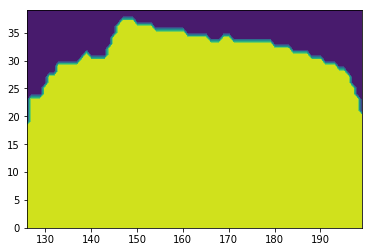

In [480]:
plt.contourf(lake_meshmask.variables['tmask'][0,:,120,:])
plt.xlim(126,199)

0.262344801496
34.6857566833
9.50243282318


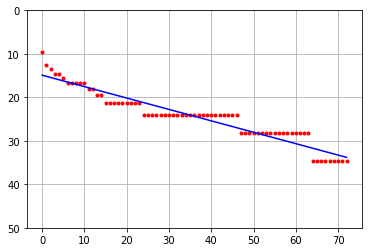

In [487]:
file1 = U24S
yslice = 120
deptht = file1.variables['deptht'][:]
yslicemask = 1 - new_domain[:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file1.variables['deptht'][:], 1) * np.ones(284),
                                        (np.ones([284,40]) *np.expand_dims(file1.variables['nav_lat'][yslice,:][:],1)).T])
i = 34
density1 = calc_rho(file1.variables['vosaline'][i,:,yslice,126:199],
                    file1.variables['votemper'][i,:,yslice,126:199],
                    pressure1[:, 126:199])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((73))
for x in range(73):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,73), list_of_depths1)
plt.plot(np.arange(0,73), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,73), func(np.arange(0,73), *popt), 'b-')
print(popt[0])
print(list_of_depths1.max())
print(list_of_depths1.min())

0.252267943271
34.6857566833
9.50243282318


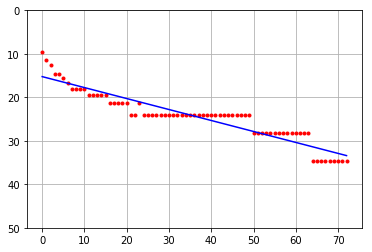

In [495]:
file1 = U48S
yslice = 120
deptht = file1.variables['deptht'][:]
yslicemask = 1 - new_domain[:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file1.variables['deptht'][:], 1) * np.ones(284),
                                        (np.ones([284,40]) *np.expand_dims(file1.variables['nav_lat'][yslice,:][:],1)).T])
i = 29
density1 = calc_rho(file1.variables['vosaline'][i,:,yslice,126:199],
                    file1.variables['votemper'][i,:,yslice,126:199],
                    pressure1[:, 126:199])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((73))
for x in range(73):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,73), list_of_depths1)
plt.plot(np.arange(0,73), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,73), func(np.arange(0,73), *popt), 'b-')
print(popt[0])
print(list_of_depths1.max())
print(list_of_depths1.min())

0.216079292873
34.6857566833
8.50123596191


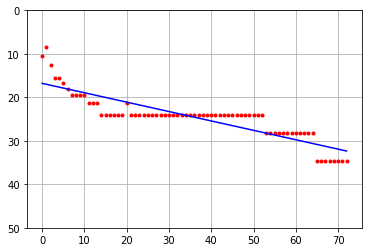

In [502]:
file1 = U72S
yslice = 120
deptht = file1.variables['deptht'][:]
yslicemask = 1 - new_domain[:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file1.variables['deptht'][:], 1) * np.ones(284),
                                        (np.ones([284,40]) *np.expand_dims(file1.variables['nav_lat'][yslice,:][:],1)).T])
i = 24
density1 = calc_rho(file1.variables['vosaline'][i,:,yslice,126:199],
                    file1.variables['votemper'][i,:,yslice,126:199],
                    pressure1[:, 126:199])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((73))
for x in range(73):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,73), list_of_depths1)
plt.plot(np.arange(0,73), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,73), func(np.arange(0,73), *popt), 'b-')
print(popt[0])
print(list_of_depths1.max())
print(list_of_depths1.min())

(126, 192)

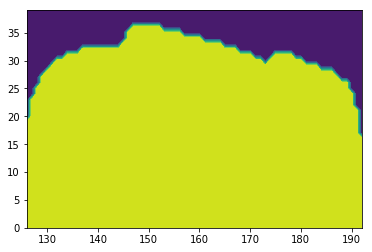

In [508]:
plt.contourf(lake_meshmask.variables['tmask'][0,:,110,:])
plt.xlim(126,192)

0.277936502877
34.6857566833
8.50123596191


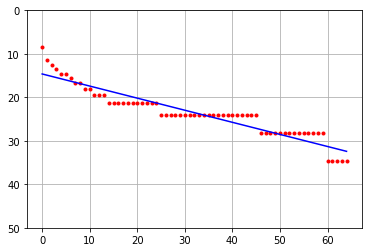

In [524]:
file1 = U24S
yslice = 110
deptht = file1.variables['deptht'][:]
yslicemask = 1 - new_domain[:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file1.variables['deptht'][:], 1) * np.ones(284),
                                        (np.ones([284,40]) *np.expand_dims(file1.variables['nav_lat'][yslice,:][:],1)).T])
i = 31
density1 = calc_rho(file1.variables['vosaline'][i,:,yslice,126:191],
                    file1.variables['votemper'][i,:,yslice,126:191],
                    pressure1[:, 126:191])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((65))
for x in range(65):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,65), list_of_depths1)
plt.plot(np.arange(0,65), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,65), func(np.arange(0,65), *popt), 'b-')
print(popt[0])
print(list_of_depths1.max())
print(list_of_depths1.min())

0.328394329832
34.6857566833
3.50003051758


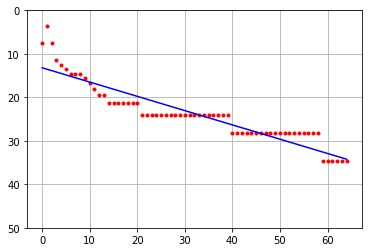

In [526]:
file1 = U48S
yslice = 110
deptht = file1.variables['deptht'][:]
yslicemask = 1 - new_domain[:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file1.variables['deptht'][:], 1) * np.ones(284),
                                        (np.ones([284,40]) *np.expand_dims(file1.variables['nav_lat'][yslice,:][:],1)).T])
i = 27
density1 = calc_rho(file1.variables['vosaline'][i,:,yslice,126:191],
                    file1.variables['votemper'][i,:,yslice,126:191],
                    pressure1[:, 126:191])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((65))
for x in range(65):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,65), list_of_depths1)
plt.plot(np.arange(0,65), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,65), func(np.arange(0,65), *popt), 'b-')
print(popt[0])
print(list_of_depths1.max())
print(list_of_depths1.min())

0.30016347103
34.6857566833
7.50062322617


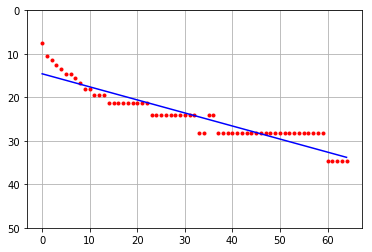

In [527]:
file1 = U72S
yslice = 110
deptht = file1.variables['deptht'][:]
yslicemask = 1 - new_domain[:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file1.variables['deptht'][:], 1) * np.ones(284),
                                        (np.ones([284,40]) *np.expand_dims(file1.variables['nav_lat'][yslice,:][:],1)).T])
i = 21
density1 = calc_rho(file1.variables['vosaline'][i,:,yslice,126:191],
                    file1.variables['votemper'][i,:,yslice,126:191],
                    pressure1[:, 126:191])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((65))
for x in range(65):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,65), list_of_depths1)
plt.plot(np.arange(0,65), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,65), func(np.arange(0,65), *popt), 'b-')
print(popt[0])
print(list_of_depths1.max())
print(list_of_depths1.min())

(126, 185)

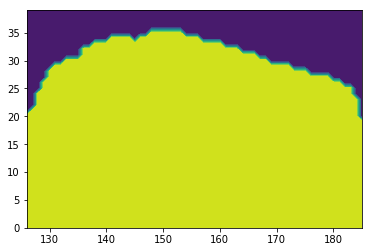

In [534]:
plt.contourf(lake_meshmask.variables['tmask'][0,:,100,:])
plt.xlim(126,185)

0.527069445535
44.5177230835
6.50031042099


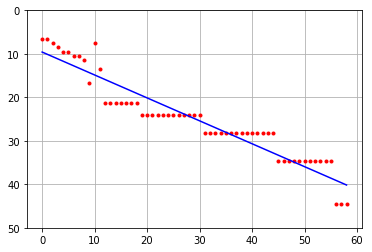

In [544]:
file1 = U24S
yslice = 100
deptht = file1.variables['deptht'][:]
yslicemask = 1 - new_domain[:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file1.variables['deptht'][:], 1) * np.ones(284),
                                        (np.ones([284,40]) *np.expand_dims(file1.variables['nav_lat'][yslice,:][:],1)).T])
i = 45
density1 = calc_rho(file1.variables['vosaline'][i,:,yslice,126:185],
                    file1.variables['votemper'][i,:,yslice,126:185],
                    pressure1[:, 126:185])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((59))
for x in range(59):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,59), list_of_depths1)
plt.plot(np.arange(0,59), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,59), func(np.arange(0,59), *popt), 'b-')
print(popt[0])
print(list_of_depths1.max())
print(list_of_depths1.min())

0.506463779056
44.5177230835
6.50031042099


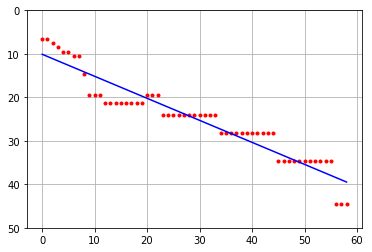

In [549]:
file1 = U48S
yslice = 100
deptht = file1.variables['deptht'][:]
yslicemask = 1 - new_domain[:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file1.variables['deptht'][:], 1) * np.ones(284),
                                        (np.ones([284,40]) *np.expand_dims(file1.variables['nav_lat'][yslice,:][:],1)).T])
i = 37
density1 = calc_rho(file1.variables['vosaline'][i,:,yslice,126:185],
                    file1.variables['votemper'][i,:,yslice,126:185],
                    pressure1[:, 126:185])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((59))
for x in range(59):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,59), list_of_depths1)
plt.plot(np.arange(0,59), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,59), func(np.arange(0,59), *popt), 'b-')
print(popt[0])
print(list_of_depths1.max())
print(list_of_depths1.min())

0.542115173919
44.5177230835
6.50031042099


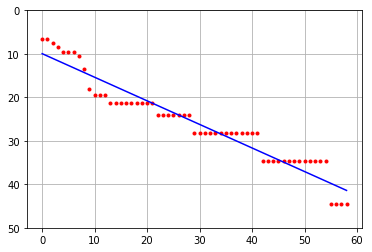

In [555]:
file1 = U72S
yslice = 100
deptht = file1.variables['deptht'][:]
yslicemask = 1 - new_domain[:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file1.variables['deptht'][:], 1) * np.ones(284),
                                        (np.ones([284,40]) *np.expand_dims(file1.variables['nav_lat'][yslice,:][:],1)).T])
i = 32
density1 = calc_rho(file1.variables['vosaline'][i,:,yslice,126:185],
                    file1.variables['votemper'][i,:,yslice,126:185],
                    pressure1[:, 126:185])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((59))
for x in range(59):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,59), list_of_depths1)
plt.plot(np.arange(0,59), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,59), func(np.arange(0,59), *popt), 'b-')
print(popt[0])
print(list_of_depths1.max())
print(list_of_depths1.min())

In [179]:
density1 = calc_rho(file1.variables['vosaline'][:], file1.variables['votemper'][:], 
                    file1.variables['deptht'][:][np.newaxis, :, np.newaxis, np.newaxis])

In [96]:
thalweg_pts = np.loadtxt('salishsealakethalweg.txt', delimiter=' ', dtype=int)

In [98]:
depth = lake_meshmask.variables['gdept_0'][:]

In [180]:
var = density1[0,...]
dep_thal, distance, var_thal = load_thalweg(
        depth[0, ...], var, lakebathy['nav_lon'][:], lakebathy['nav_lat'][:],
        thalweg_pts)

In [181]:
xx_thal = distance

In [102]:
def _fill_in_bathy(variable, mesh_mask, thalweg_pts):
    """For each horizontal point in variable, fill in first vertically masked
    point with the value just above.
    Use mbathy in mesh_mask file to determine level of vertical masking

    :arg variable: the variable to be filled
    :type variable: 2D numpy array

    :arg mesh_mask: Salish Sea NEMO model mesh_mask data
    :type mesh_mask: :py:class:`netCDF4.Dataset`

    :arg thalweg_pts: Salish Sea NEMO model grid indices along thalweg
    :type thalweg_pts: 2D numpy array

    :returns: newvar, the filled numpy array
    """
    mbathy = mesh_mask.variables['mbathy'][0, :, :]
    newvar = np.copy(variable)

    mbathy = mbathy[thalweg_pts[:, 0], thalweg_pts[:, 1]]
    for i, level in enumerate(mbathy):
        newvar[level, i] = variable[level-1, i]
    return newvar

In [182]:
var_plot = _fill_in_bathy(var_thal, lake_meshmask, thalweg_pts)

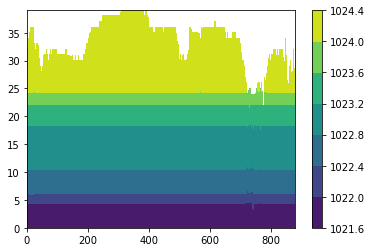

In [190]:
plt.contourf(ma.masked_equal(var_plot, 999.84259))
plt.colorbar()

In [199]:
fig, ax = plt.subplots()
contour_thalweg(ax, density1, lakebathy, lake_meshmask, np.linspace())

(40, 880)

In [220]:
rho = 1023.8
index1 = (np.abs(var_plot - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((880))
for x in range(880):
    list_of_depths1[x] = deptht[index1[x]]

In [192]:
xx_thal.shape

(40, 880)

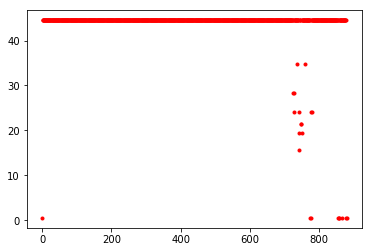

In [221]:
plt.plot(range(880), list_of_depths1, 'r.')

In [556]:
4.5*15

67.5

Full set up is when one of the density points is at surface (~0.5 m). Tilt slope is calculated at the hour before full set up. Did it for every 10 grid points as per Susan's suggestion. (first one was at y = 200)